<a href="https://colab.research.google.com/github/Ryoma-HCU/Prog2kakushin/blob/main/work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numpyを用いた課題プログラムの作成

最初に下記のコードを実行して，必要なライブラリをインストールする．

In [12]:
pip install pydub

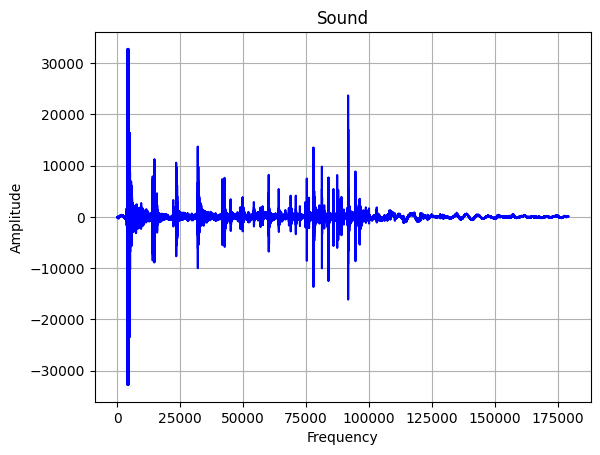

調べたい周波数帯域を入力してください(自然数)
下限1
上限100

調べたい入力音声の範囲を入力してください(0～179200)
下限0
上限10000



[179.88250219 171.70276095 139.56389297  32.50681638  51.08228112
  34.08897871  27.50849654  19.68552769   7.33962639  21.59267024
  13.01281663  35.74898548  51.05519695  36.97660718  29.39456192
  14.00684454  21.8410203   17.08264688  43.44548655  64.22818781
  31.38746787  30.3316182   42.33063435  33.40719925  38.9392987
  28.70078584  48.34433736  34.8125534   50.34785066  64.23075562
  48.23720117  43.06877913  39.04306823  16.34271336  31.06969107
  52.00687241  35.5628483    5.69909383  20.69517318  28.74737603
  55.9428535   54.73177918  76.50943898 110.09656642  41.09681576
  54.32269374  51.99301292  44.44889975  70.37009417  47.40094983
  35.5558852   47.69720568  35.30710022   6.73791021  20.23400923
   4.07449863  23.08855981  13.73354468  13.81348609  26.78349128
  72.36271359  59.604992    59.30393662  17.42647857  55.29635081
  31.20479101  27.07312878  14.07520112   4.90930001  10.62000481
   9.09236615  19.05655959  35.92366979  22.64571101  43.88648383
  50.048845

<function matplotlib.pyplot.show(close=None, block=None)>

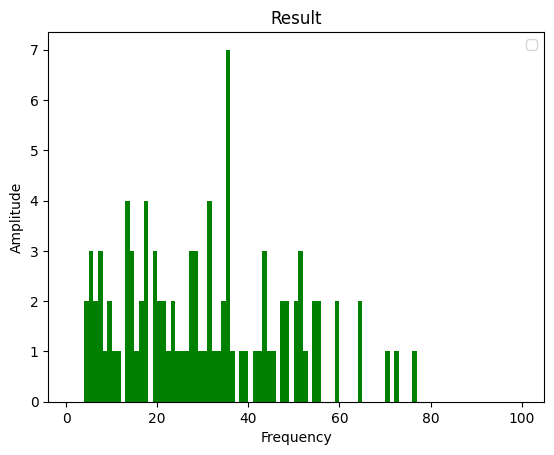

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from pydub import AudioSegment

#fname = input("読み込みたいファイル名を入力してください：")
#extension = input("拡張子名を入力してください：")

#サンプルファイルのダウンロード
#エラー処理

# 時間領域グラフ出力
sound = AudioSegment.from_file("pencil_roll.mp3", "mp3")
#sound = AudioSegment.from_file(str(fname)+"."+str(extension), str(extension))
f = sound.get_array_of_samples()

plt.plot(f, c="b", label="")
plt.title("Sound")
#plt.title(str(fname))
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

amp = np.array([])

#数値エラー処理(自然数・上限下限逆)・できればHz変換
print("調べたい周波数帯域を入力してください(自然数)")
band_low = int(input("下限"))
band_up = int(input("上限"))
print()
print("調べたい入力音声の範囲を入力してください(0～"+str(len(f))+")")
range_low = int(input("下限"))
range_up = int(input("上限"))
print()

# 周波数領域グラフ出力
T = range_up - range_low
for n in range(band_low, band_up+1):
  scos_n = 0
  ssin_n = 0
  for x in range(range_low, range_up):
    scos_n += np.cos(2*n*x*np.pi/T)*(f[x]+f[x+1])/2
    ssin_n += np.sin(2*n*x*np.pi/T)*(f[x]+f[x+1])/2
  a_n = scos_n * 2/T
  b_n = ssin_n * 2/T
  amp = np.append(amp, np.sqrt(a_n**2 + b_n**2))

print(amp)

#範囲みやすく・最大振れ幅/周波数表示・label・ヒストグラム振幅値と合ってない
plt.hist(amp, range=(band_low, band_up), bins=(int(band_up)-int(band_low)), label="", color="g")
plt.legend()
plt.title("Result")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show